# **TP Wavelets de Dakhlaoui Rayane**

In this TP, we will work on some fundamental concepts in Wavelets and compression of images.

First we'll briefly check the limitations of the Fourier transform. We'll then check some fundamental properties of a family of Wavelets and compute the Wavelet transform of a very simple signal. In the second part of the TP, we will use the DWT to compress and image.

Make sure to sequentially run all the cells in each section, so that the intermediate variables / packages will carry over to the next cell

We recommend you save a copy of this colab in your drive so you don't lose progress!

**Note 1:** As mentioned in the course and since there's not any policy regarding ChatGPT at Télécom level yet, you can use it. However, using ChatGPT without understanding their outputs is not OK, and will be penalized accordingly in your grade. Please be sure of all the functions you'll use.

**Note 2:** Several points have associated questions. When answering these questions, all responses should be properly justified. ChatGPT answers are very easy to spot.

**Note 3:** Always plot the functions and outputs you're generating. If the output or function is not properly plotted/shown, this will reduce points in your grade.

# Setup
First, we install PyWavelets

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftfreq
from scipy.signal import convolve
import pywt
pywt.__version__

'1.6.0'

# Important
Google Colab is an interesting tool to try things out quickly. However, Google Colab and more general Notebooks are not meant to be an Integrated Development Environment (IDE). For a real job, please use an actual IDE like PyCharm or VS Code.

# Limitation of the Fourier Transform
*   Create a sinusoidal signal of 2.5 seconds of duration.
*   Set up a sampling rate of 20kHz. The signal should be divided in 5 parts of 0.5 seconds of duration each.
*  The signal should have the following frequencies in this order {10 Hz, 30 Hz, 60 Hz, 30 Hz, 10 Hz}.

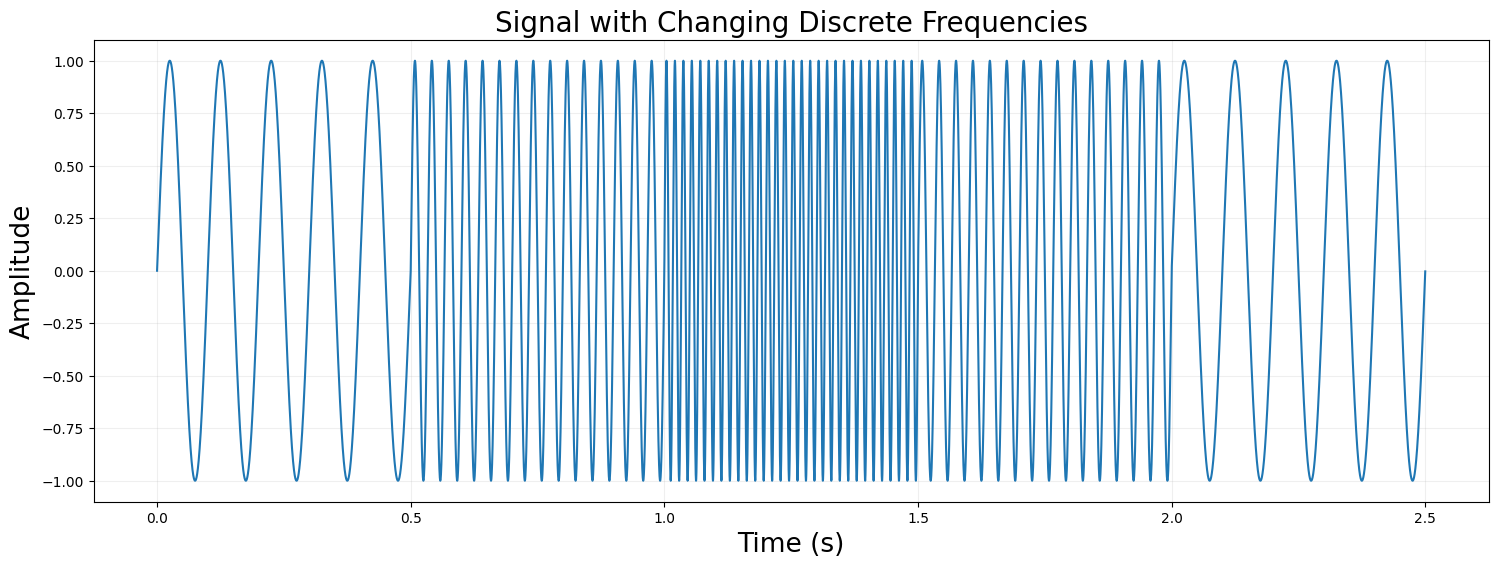

In [4]:
# Your code here
duration = 2.5
Fs = 20000
t = np.linspace(0, duration, int(Fs * duration), endpoint=False)

# Frequencies for each segment
frequencies = [10, 30, 60, 30, 10]
segment_duration = 0.5  # seconds
signal = np.concatenate([np.sin(2 * np.pi * freq * t[:int(segment_duration * Fs)])for freq in frequencies])


font_size = 20
plt.figure(figsize=(18, 6))
plt.plot(t, signal, linewidth=1.5)
plt.title('Signal with Changing Discrete Frequencies', fontsize=font_size)
plt.xlabel('Time (s)', fontsize=font_size-1)
plt.ylabel('Amplitude', fontsize=font_size-1)
plt.grid(alpha=0.2)
plt.show()


Now, you should compute the Discrete Fourier Transform of the signal. You can use any library from Python you prefer. You might need to cut the x-axis in the Fourier transform up to 100 Hz in the visualization. Please check https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html and https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html

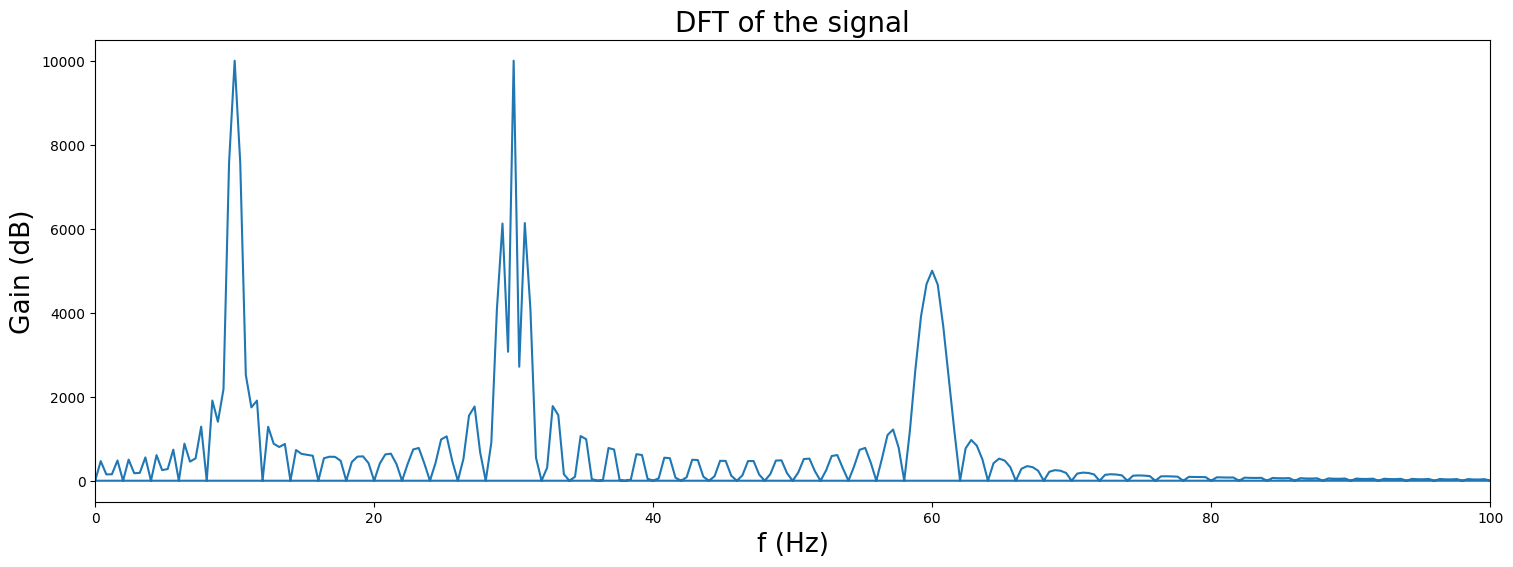

In [5]:
# Your code here
fft =np.abs(np.fft.fft(signal))
n = fft.size
timestep = 1/Fs
fft_freq = fftfreq(n,timestep)

plt.figure(figsize=(18, 6))
plt.plot(fft_freq,fft)
plt.title('DFT of the signal', fontsize=font_size)
plt.xlabel('f (Hz)', fontsize=font_size-1)
plt.ylabel('Gain (dB)', fontsize=font_size-1)

# Set the x-axis limit to 100 Hz
plt.xlim(0, 100)

plt.show()


**QUESTIONS**

1) Does the established sampling rate satisfy the Nyquist-Shannon sampling theorem to avoid aliasing? Please justify.

  The fft of the signal is negligeable around 700-800 Hz so we have $f_{\text{max}} << \frac{F_e}{2}=10kHz$ and so the established sampling rate satisfy the Nyquist-Shannon sampling theorem to avoid aliasing


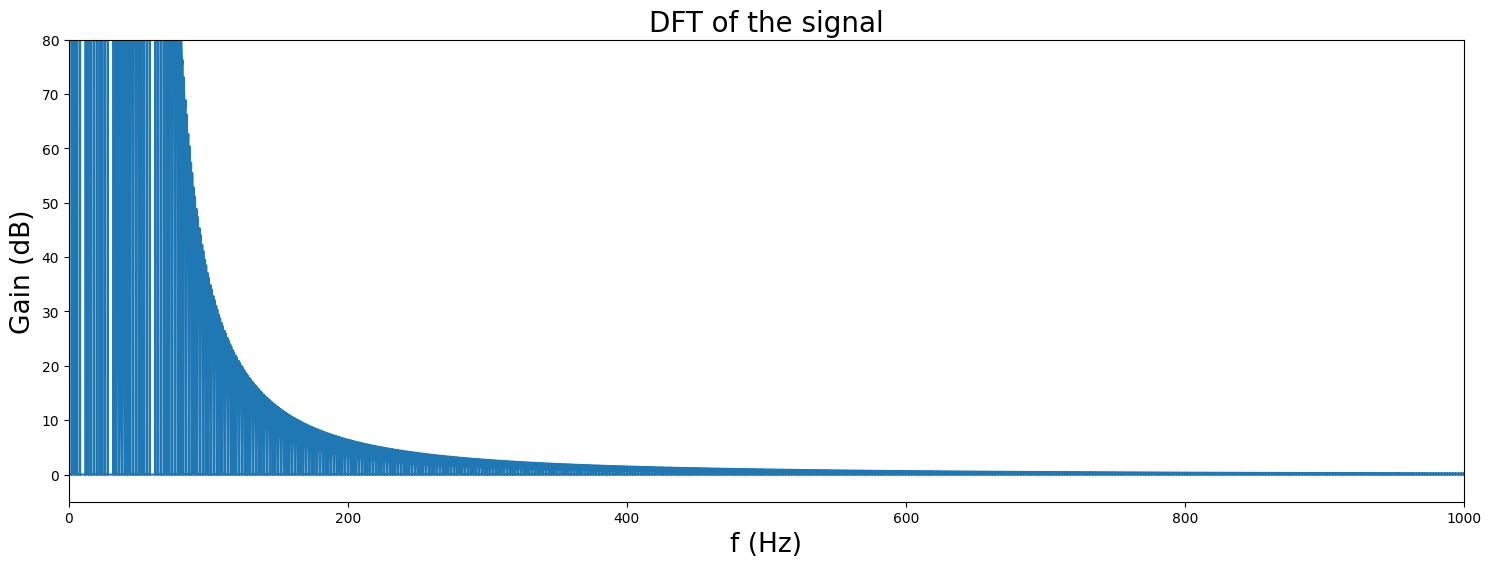

In [6]:
plt.figure(figsize=(18, 6))
plt.plot(fft_freq,fft)
plt.title('DFT of the signal', fontsize=font_size)
plt.xlabel('f (Hz)', fontsize=font_size-1)
plt.ylabel('Gain (dB)', fontsize=font_size-1)

# Set the limits
plt.xlim(0, 1000)
plt.ylim(-5,80)
plt.show()

2) What can you say from the signal looking **only** at the Fourier transform?

According to the DFT plot, our three main harmonics are 10 Hz, 30 Hz, and 60 Hz. However, since we are using a discrete model, additional harmonics may appear.



3) Can you be certain about the location of some frequency component in the time domain? Why?

No, the FFT analyzes the entire signal, so it cannot provide information about the location of specific frequencies in the time domain. To obtain such details, we would need to segment the signal and focus on portions containing a single frequency.

# **Mother Wavelet**
As we saw in the course, a wavelet is not just a function but a whole family of functions that satisfy certain requirements. In this part of the TP we're gonna work with the Morlet wavelet defined as follows: $\Psi(t)=k e^{iw_0t}e^{-\frac{1}{2}(\frac{t}{\sigma})^2}$. Please generate a Morlet wavelet in Python **WITHOUT using PyWavelets** with the following parameters:

-Center frequency of the wavelet = 10 Hz

-Sampling rate $\eta$ = 20000 Hz

-$k=\frac{1}{\sqrt{\eta}}$

-$\sigma = 0.1$

You can generate the wavelet between -1 and 1 seconds, so the time duration of the wavelet is 2 seconds. For this part, you just need to generate the real part of the wavelet.

Text(0, 0.5, 'Amplitude')

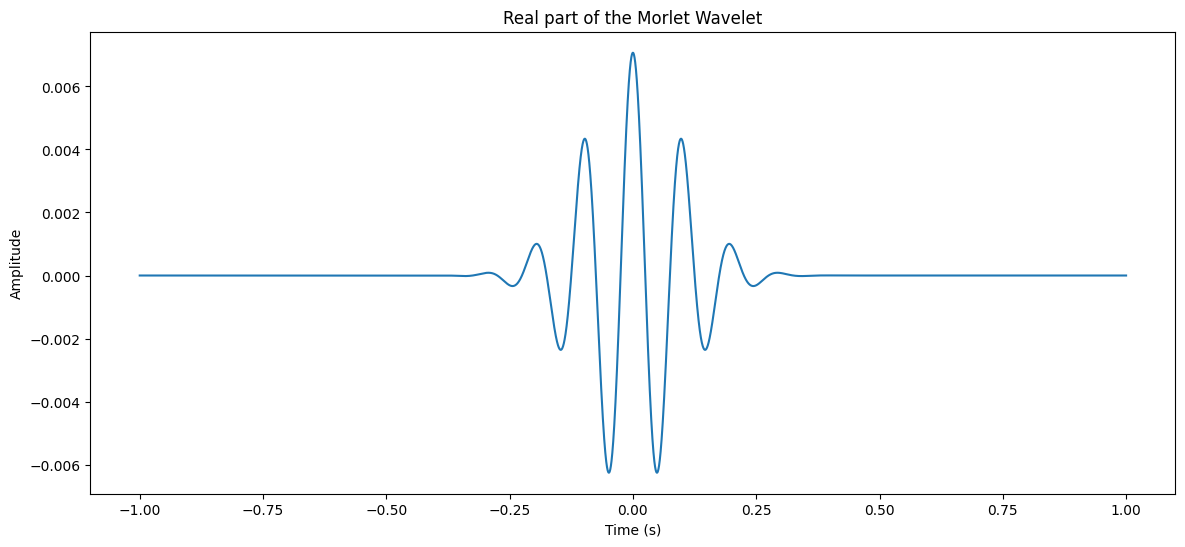

In [7]:
# Your code here
duration = 2
Fs = 20000
psi = []
k = 1/np.sqrt(Fs)
sigma = 0.1
w0 = 2*np.pi*10


time = np.linspace(-duration/2, duration/2, int(Fs * duration), endpoint=False)
for t in time:
    psi.append(k*np.exp(1j*w0*t)*np.exp(-1/2*(t/sigma)**2))

psi_realPart = np.real(np.array(psi))


plt.figure(figsize=(14, 6))
plt.plot(time, psi_realPart, linewidth=1.5)
plt.title('Real part of the Morlet Wavelet')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Please show that the mother wavelet we just created satisfies the admissibility and the finite energy conditions:

In [8]:
mean = np.mean(psi_realPart)
energy = np.mean(np.abs(psi)**2)
print(f'Mean = {mean} ≃ 0' '  => So the admissibility condition is satisfied')
print(f'Energy = {energy}' ' < ∞  => So the wavelet function have finite energy')

Mean = 2.3709122542086814e-12 ≃ 0  => So the admissibility condition is satisfied
Energy = 4.431134627263791e-06 < ∞  => So the wavelet function have finite energy


**Note:** In real life, you have to deal with finite-precision related problems. Therefore, if for the admissibility condition you don't have exactly the value you were expecting for, don't worry.

# **Convolution**

As we saw in the course, we need a measure of similarity to compute the wavelet transform. We also saw that we can easily compute the shift in time and similarity calculation with the 1-D convolutions.

* Generate a chirp sinusoidal signal from -5 to 5 seconds with an initial frequency of 5 Hz and final frequency of 15 Hz and sampling rate of 20kHz:

Text(0.5, 0, 'Time')

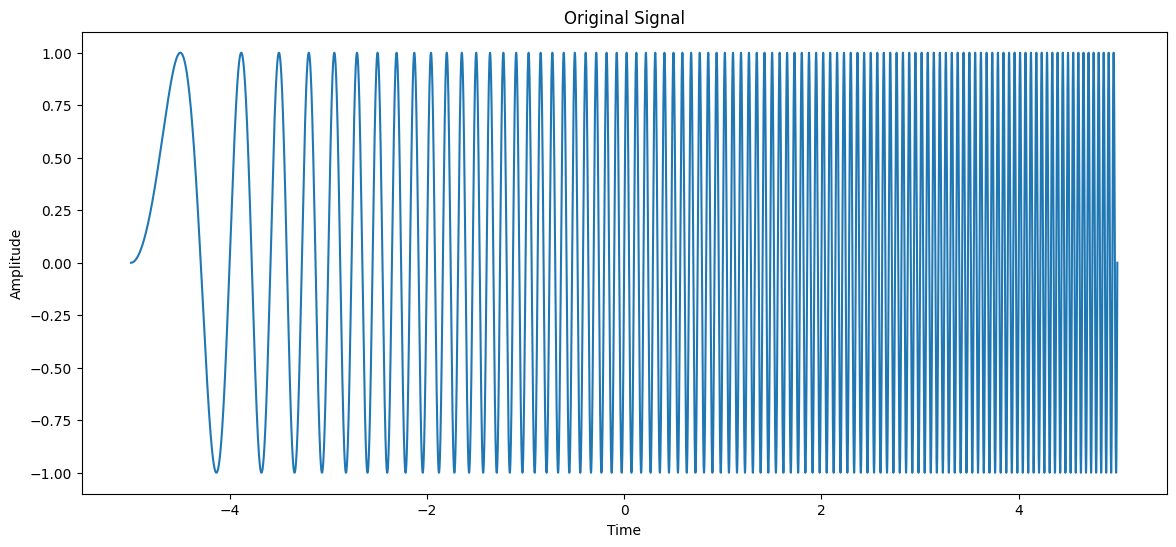

In [9]:
# Your code here
t_start = -5
t_end = 5
Fs = 20000
f_start = 5
f_end = 15

time_signal = np.linspace(t_start, t_end, int((t_end - t_start) * Fs))
chirp_signal = np.sin(2 * np.pi *np.linspace(f_start,f_end,len(time_signal)) * time_signal)

plt.figure(figsize=(14, 6))
plt.plot(time_signal, chirp_signal)
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time')

Now create a Morlet wavelet with the following parameters:

* Center frequency of the wavelet = 10 Hz

* Sampling rate $\eta$ = 20000 Hz

* $k=\frac{1}{\sqrt{\eta}}$
* $\sigma = 0.2$
* Duration = 2 seconds


Text(0.5, 0, 'Time')

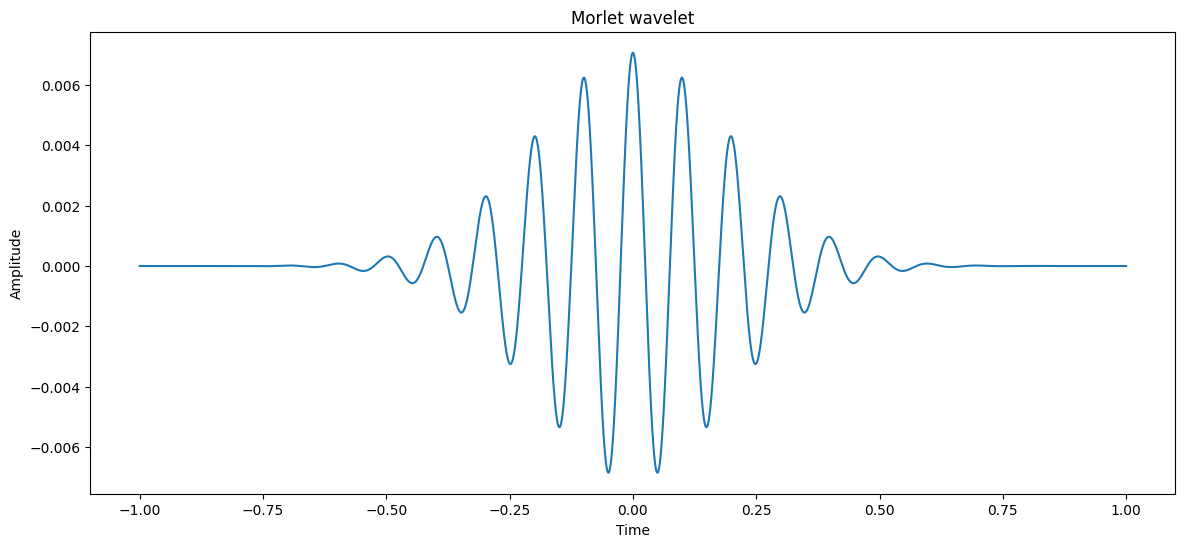

In [10]:
duration = 2
Fs = 20000
psi = []
k = 1/np.sqrt(Fs)
sigma = 0.2
w0 = 2*np.pi*10


time = np.linspace(-duration/2, duration/2, int(Fs * duration), endpoint=False)
for t in time:
    psi.append(k*np.exp(1j*w0*t)*np.exp(-1/2*(t/sigma)**2))

psi_realPart = np.real(np.array(psi))


plt.figure(figsize=(14, 6))
plt.plot(time, np.real(psi_realPart))
plt.title('Morlet wavelet')
plt.ylabel('Amplitude')
plt.xlabel('Time')

Compute the convolution between the signal and $Re(\Psi(t))$. For reference on how to perform convolution with scipy 'convolve' function, please check https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

Text(0, 0.5, 'Amplitude')

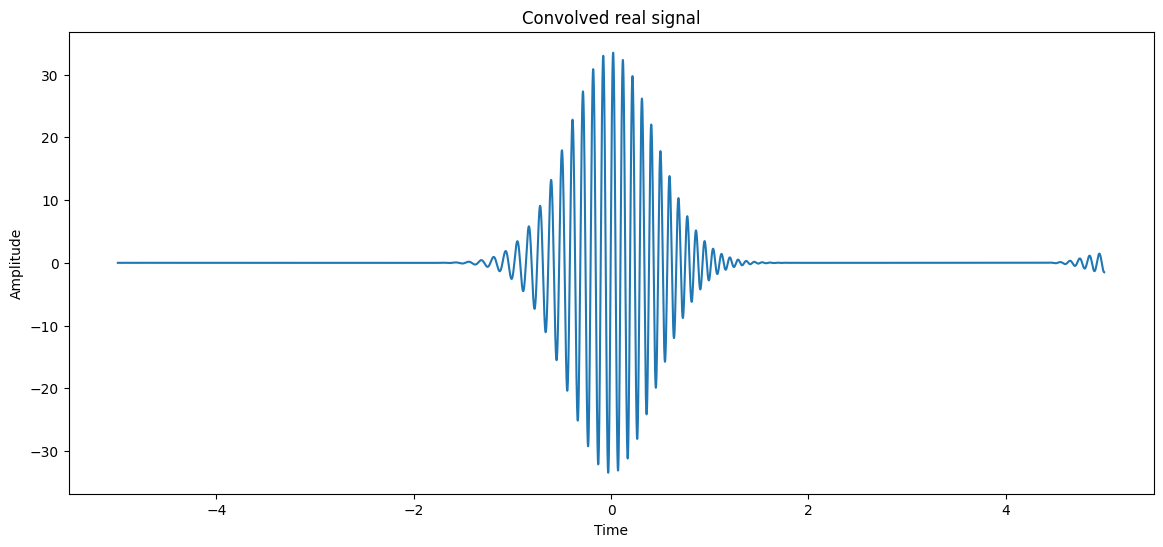

In [11]:
convolved_real_signal = convolve(chirp_signal,psi_realPart, mode='same')

plt.figure(figsize=(14, 6))
plt.plot(time_signal, convolved_real_signal)
plt.title('Convolved real signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

There are some points where the convolution is zero, even in regions of high similarity between the wavelet and the signal. **Is this OK?** If it's not, propose a solution to that.


=> We have zeros that are not meant to be because we only convoluated the real part.

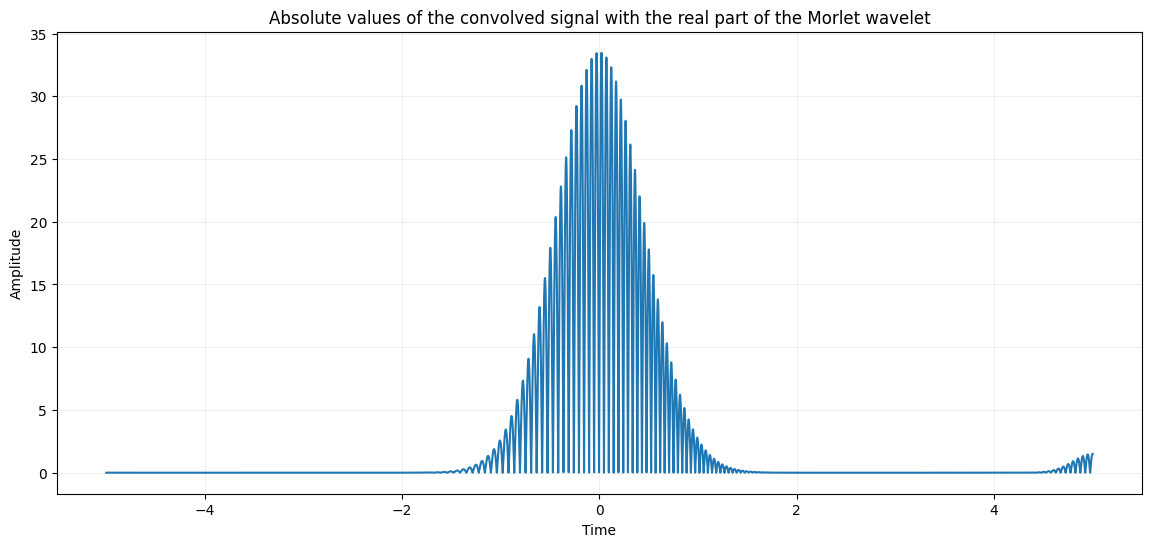

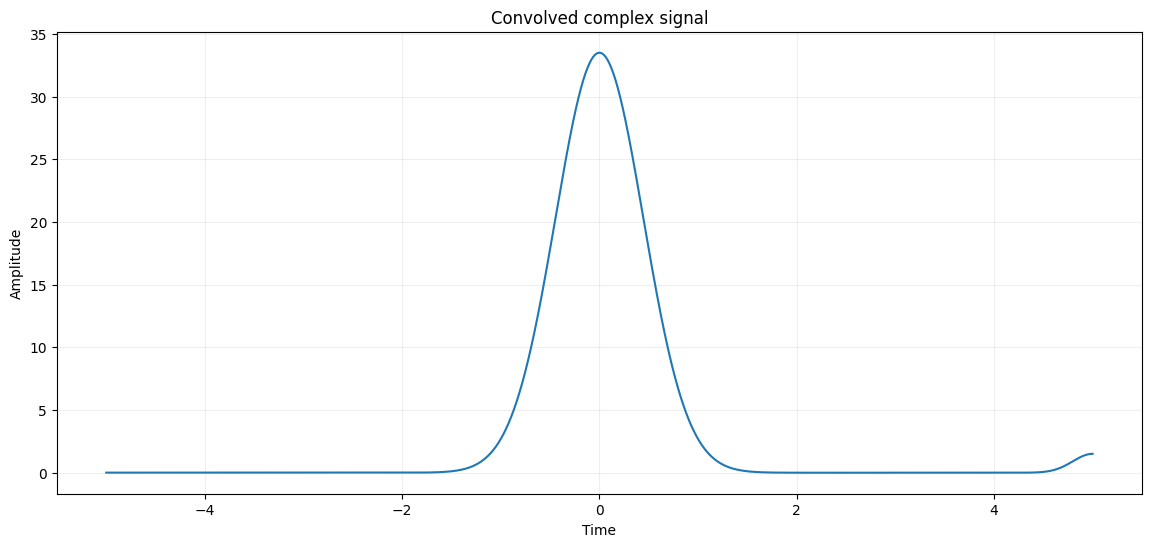

In [12]:
# Your code here
psi_imagPart = np.imag(np.array(psi))
convolved_imag_signal = convolve(chirp_signal,psi_imagPart, mode='same')
convolved_signal = convolved_real_signal + 1j*convolved_imag_signal


plt.figure(figsize=(14, 6))
plt.plot(time_signal,abs(convolved_real_signal))
plt.title('Absolute values of the convolved signal with the real part of the Morlet wavelet')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(alpha=0.2)

plt.figure(figsize=(14, 6))
plt.plot(time_signal, np.abs(convolved_signal))
plt.title('Convolved complex signal')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.grid(alpha=0.2)

# **Image Compression**
For this part, we'll use the Discrete Wavelet Transform (DWT) implemented as a filter bank to do image compression. The first step is to have an image to compress. For doing so you can use the following piece of code to download an image of Trudy.

In [13]:
!wget https://raw.githubusercontent.com/jhonygiraldo/jhonygiraldo.github.io/main/Trudy_for_compression.jpeg

zsh:1: command not found: wget


**Visualize image:** With the following code you can visualize the image. If you're using Google Collab, most probably you already have the open cv library installed. If you're using Jupyter Notebook for example, you'll have to install open cv if it's not already installed.

In [14]:
# Let us define a function for visualizing images
def show_image(image, title='Input Image', font_size=12,fig_size = (10, 10)):
  #A function that uses matplotlib to show grayscale images
  plt.figure(figsize=fig_size)
  plt.imshow(image, cmap='gray')
  plt.title(title, fontsize=font_size)
  plt.axis('off')

In [15]:
import cv2

# Load your image as a grayscale
input_image = cv2.imread('Trudy_for_compression.jpeg', cv2.IMREAD_GRAYSCALE)
# Display the original image
show_image(input_image, 'Input Image')

ModuleNotFoundError: No module named 'cv2'

If you use some wavelet function (Biorthogonal 1.3 in this case), the 1-level 2D wavelet decomposition of our input image is given as follows:

In [ ]:
# # You can see a list of wavelet families
import pywt
pywt.families()

In [ ]:
# For each family, you can list the available wavelets
pywt.wavelist(family='db', kind='all')

In the previous image we applied a threshold in the wavelet coefficients for visualization purposes. **Please explain the meaning of each of these 4 images**.

**YOUR ANSWER HERE:**

We have here four images so it's correspond to the first level decomposition:
- **Top left**: the *low frequencies*
- **Top right**: horizontal filters for the *high frequencies* obtained by the convolution with the wavelet in the *horizontal direction*
- **Bottom left**: vertical filters for the *high frequencies* by the convolution with the wavelet in the *vertical direction*
- **Bottom right**  : diagonal filters for the *high frequencies* by the convolution with the wavelet in the *diagonal direction*



Now, you should compute the six-levels 2D wavelet decomposition of the input image with a Daubechies wavelet with six vanishing moments using the PyWavelet library. Please check https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-decomposition-using-wavedec2

In [ ]:
# Your code here
coeffs=pywt.wavedec2(input_image, 'db6',level = 6)

* Set a threshold of value of 100 and take to zero the values less than that in the 2D wavelet decomposition. **Note:** You should only threshold the outputs of the high-pass filters.



In [ ]:
threshold = 100
coeffs_thresholded = [coeffs[0]]
for detail_level in coeffs[1:]:
    coeffs_thresholded.append(tuple(np.where(np.abs(detail) < threshold, 0, detail) for detail in detail_level))

* Compute the IDWT to reconstruct the image after the "compression". Check https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-reconstruction-using-waverec2 as a reference.

In [ ]:
# Your code here
compressed_image=pywt.waverec2(coeffs_thresholded, 'db6')

#plot compressed image
show_image(compressed_image, 'Compressed Image')

What's the compression ratio?

In [ ]:
# Your code here
coeffs_array, _ = pywt.coeffs_to_array(coeffs)
coeffs_thresholded_array, _ = pywt.coeffs_to_array(coeffs_thresholded)
coeff_number = np.count_nonzero(coeffs_array)
coeff_thresholded_number = np.count_nonzero(coeffs_thresholded_array)
compression_ratio = coeff_number/coeff_thresholded_number
print(f'Compression ratio: {compression_ratio}')

# **Putting everything together**

In this exercise we'll analyze the Peak Signal to Noise Ration (PSNR) of the compressed images for different thresholds. For doing so, we'll give you the function to compute the PSNR between the original and compressed image.

In [ ]:
def psnr(original_image, compressed_image):
    h,w = original_image.shape
    mse = np.sum(np.abs(original_image-compressed_image)**2)/(h*w)
    return 20* np.log10(255**2/mse)

Now, you have to create a function codec that receives the input image, the wavelet to be used, the number of levels, and the threshold value. This function returns the compressed image and the compression ratio. **Note:** You already did that previously.

In [ ]:
def codec(input_image,wavelet='db4',num_levels=6,threshold=100):
  coeffs=pywt.wavedec2(input_image, wavelet,level = num_levels)
  coeffs_thresholded = [coeffs[0]]
  for detail_level in coeffs[1:]:
    coeffs_thresholded.append(tuple(np.where(np.abs(detail) < threshold, 0, detail) for detail in detail_level))
  compressed_image=pywt.waverec2(coeffs_thresholded, wavelet)
  coeffs_array, _ = pywt.coeffs_to_array(coeffs)
  coeffs_thresholded_array, _ = pywt.coeffs_to_array(coeffs_thresholded)
  coeff_number = np.count_nonzero(coeffs_array)
  coeff_thresholded_number = np.count_nonzero(coeffs_thresholded_array)
  compression_ratio = coeff_number/coeff_thresholded_number
  return compressed_image, compression_ratio

Now, we compare the performance of the 'db4' and the 'bior1.3' wavelets in terms of compression ratio and PSNR for different thresholds.

In [ ]:
wavelet_1 = 'db4'
wavelet_2 = 'bior1.3'
thresholds = [5,10,20,40,80,100]
num_levels=6

compressed1=[]
compressed2=[]
psnr1=[]
psnr2=[]
for threshold in thresholds:
    compressed_image,compression_ratio1=codec(input_image,wavelet_1,num_levels,threshold)
    compressed1.append(compression_ratio1)
    psnr1.append(psnr(input_image,compressed_image))
    compressed_image,compression_ratio2=codec(input_image,wavelet_2,num_levels,threshold)
    compressed2.append(compression_ratio2)
    psnr2.append(psnr(input_image,compressed_image))

plt.figure(1)
plt.plot(thresholds,compressed1,label="Daubechies wavelet")
plt.plot(thresholds,compressed2,label="Biorthogonal wavelet")
plt.title('Compression ratio for the Daubechies and the Biorthogonal wavelets with different thresholds')
plt.xlabel('Threshold')
plt.ylabel('Compression ratio in %')
plt.legend();

plt.figure(2)
plt.plot(thresholds[1:],psnr1[1:],label="Daubechies wavelet")
plt.plot(thresholds[1:],psnr2[1:],label="Biorthogonal wavelet")
plt.title('PSNR for the Daubechies and the Biorthogonal wavelets with different thresholds')
plt.xlabel('Threshold')
plt.ylabel('PSNR en dB')
plt.legend();

**QUESTIONS**

1) Which wavelet is better for the Trudy_for_compression.jpeg image and why?

Daubechies wavelets are more effective for compressing JPEG images when using high thresholds. As the threshold increases, the efficiency gap between Daubechies and Biorthogonal wavelets widens, while the PSNR difference stays consistent, although Biorthogonal wavelets typically achieve a higher PSNR. Conversely, for lower thresholds, Biorthogonal wavelets show better performance.